In [3]:
import numpy as np
from keras.datasets import cifar10


In [4]:
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 65s 0us/step


In [5]:
print("Shape of train images",X_train.shape,Y_train.shape)
print("Shape of test images",X_test.shape,Y_test.shape)

Shape of train images (50000, 32, 32, 3) (50000, 1)
Shape of test images (10000, 32, 32, 3) (10000, 1)


In [6]:
print(Y_train.shape[0])

50000


In [7]:
#No of unique classes
print(np.unique(Y_train).shape[0])

10


In [8]:
#One hot encoding
num_classes=10
from keras.utils import np_utils
Y_train=np_utils.to_categorical(Y_train,num_classes)
Y_test = np_utils.to_categorical(Y_test, num_classes)


In [9]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [11]:

import tensorflow as tf
tf.convert_to_tensor(X_train)


<tf.Tensor: shape=(50000, 32, 32, 3), dtype=uint8, numpy=
array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 1

In [12]:
tf.convert_to_tensor(Y_train)

<tf.Tensor: shape=(50000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)>

In [13]:
import matplotlib.pyplot as plt

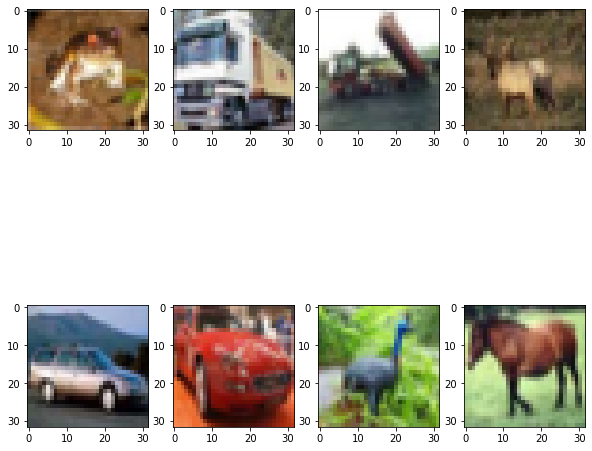

In [14]:
fig=plt.figure(figsize=(10,10))
for i in range(1,9):
  img = X_train[i-1]
  fig.add_subplot(2, 4, i)
  plt.imshow(img)

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

In [17]:
model = Sequential()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)               

In [18]:
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


In [19]:
X_train_scratch = X_train/255.
X_test_scratch = X_test/255.

In [20]:
from keras.callbacks import ModelCheckpoint

In [21]:
checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5', 
                               verbose=1,save_best_only=True)

In [22]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, 
          verbose=1, callbacks=[checkpointer], validation_split=0.2, shuffle=True)

Epoch 1/10
1250/1250 [==============================] - ETA: 0s - loss: 1.9425 - accuracy: 0.3738
Epoch 00001: val_loss improved from inf to 1.52910, saving model to scratchmodel.best.hdf5
1250/1250 [==============================] - 37s 30ms/step - loss: 1.9425 - accuracy: 0.3738 - val_loss: 1.5291 - val_accuracy: 0.4557
Epoch 2/10
1250/1250 [==============================] - ETA: 0s - loss: 1.4081 - accuracy: 0.4971
Epoch 00002: val_loss improved from 1.52910 to 1.32509, saving model to scratchmodel.best.hdf5
1250/1250 [==============================] - 37s 30ms/step - loss: 1.4081 - accuracy: 0.4971 - val_loss: 1.3251 - val_accuracy: 0.5309
Epoch 3/10
1250/1250 [==============================] - ETA: 0s - loss: 1.2602 - accuracy: 0.5532 ETA: 0s - loss: 1.2601 
Epoch 00003: val_loss improved from 1.32509 to 1.26763, saving model to scratchmodel.best.hdf5
1250/1250 [==============================] - 39s 31ms/step - loss: 1.2602 - accuracy: 0.5532 - val_loss: 1.2676 - val_accuracy: 0.5

In [23]:
#Evaluate the model on the test data
score = model.evaluate(X_test, Y_test)

#Accuracy on test data
print('Accuracy on the Test Images: ', score[1])

313/313 [==============================] - 2s 8ms/step - loss: 1.0661 - accuracy: 0.6470
Accuracy on the Test Images:  0.6470000147819519


### So, our CNN model produces an accuracy of 62% on the test dataset. That\u2019s great, but can we do better. Let\u2019s implement transfer learning and check if we can improve the model. We will be using the Resnet50 model, pre-trained on the \u2018Imagenet weights\u2019 to implement transfer learning. We are using ResNet50 model but may use other models (VGG16, VGG19, InceptionV3, etc.) also.

In [24]:
from keras.applications.resnet50 import ResNet50, preprocess_input

In [25]:
#Loading the ResNet50 model with pre-trained ImageNet weights
model = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))


94773248/94765736 [==============================] - 34s 0us/step


In [ ]:
!pip install scipy==1.1.0



In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from skimage.transform import resize

## The Cifar-10 dataset is small and similar to the \u2018ImageNet\u2019 dataset. So, we will remove the fully connected layers of the pre-trained network near the end. To implement this, we set \u2018include_top = False\u2019, while loading the ResNet50 model

In [ ]:
X_train_new = np.array([resize(X_train[i], (200, 200, 3)) for i in range(0, len(X_train))]).astype('float32')

#Preprocessing the data, so that it can be fed to the pre-trained ResNet50 model. 
resnet_train_input = preprocess_input(X_train_new)

#Creating bottleneck features for the training data
train_features = model.predict(resnet_train_input)

#Saving the bottleneck features
np.savez('resnet_features_train', features=train_features)

In [30]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
model.fit(train_features, y_train, batch_size=32, epochs=10,
          validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

In [ ]:
#Evaluate the model on the test data
score  = model.evaluate(test_features, y_test)

#Accuracy on test data
print('Accuracy on the Test Images: ', score[1])